# **Customer Segmentation for Marketing Strategies** 

##  **Business Understanding**

### 1. Project Description/Background

 In the ever-evolving landscape of marketing, understanding customer behavior is paramount for businesses aiming to tailor their strategies effectively. Customer segmentation, a pivotal aspect of marketing analytics, facilitates the categorization of customers into distinct groups based on shared characteristics. This segmentation enables businesses to craft personalized marketing approaches, thereby enhancing customer satisfaction and optimizing resource allocation. This study delves into the realm of customer segmentation using clustering techniques, with a specific focus on leveraging purchasing behavior as a primary criterion. The objective is to unravel patterns within a dataset—namely, the Mall Customer Segmentation Data—that offer insights into diverse customer personas. By dissecting these patterns, businesses can better comprehend the nuances of their customer base, paving the way for targeted marketing strategies that resonate with specific segments.


**Objective:**

Use clustering techniques to segment customers into distinct groups based on purchasing behavior.

#### 2. Features

The dataset provided contains the following fields:

1. CustomerID : Unique ID assigned to the customer.
2. Gender: Gender of the customer.
4. Age: Age of the customer.
5. Annual Income (k$): Annual Income of the customer.
6. Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.


**The Hypothesis**

  **Null Hypothesis:** Annual income has no significant correlation with spending score..
  
  **Alternative Hypothesis:** There is a significant correlation between annual income and spending score.

**The Analytical Questions**
1. What is the average spending score for male and female customers
2. What is the distribution of spending scores across different age groups?
3. How does annual income correlate with spending score?

### Data Understanding

### Data Analysis and Hypothesis Testing

In [102]:
# Data manipulation packages
import pandas as pd
import numpy as np

#Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import the KMeans class from the cluster package
from sklearn.cluster import KMeans

from scipy.stats import pearsonr

Load Data

In [103]:
# load dataset from df_mall_customers DataFrame
df_mall_customers = pd.read_csv ('Dataset/Mall_Customers.csv')
# first 5 row in DataFrame
df_mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis

In [104]:
# Show the number of record and columuns
df_mall_customers.shape

(200, 5)

In [105]:
# show information of the dataset
df_mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [106]:
# check for missing values in DataFrame
df_mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [107]:
# Descriptive statistics
df_mall_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [108]:
completely_empty_rows = df_mall_customers.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


### <b> Univariate Data analysis

In [109]:
#Dropped the customer Id because I felt it was not important for our analysis
del df_mall_customers['CustomerID']

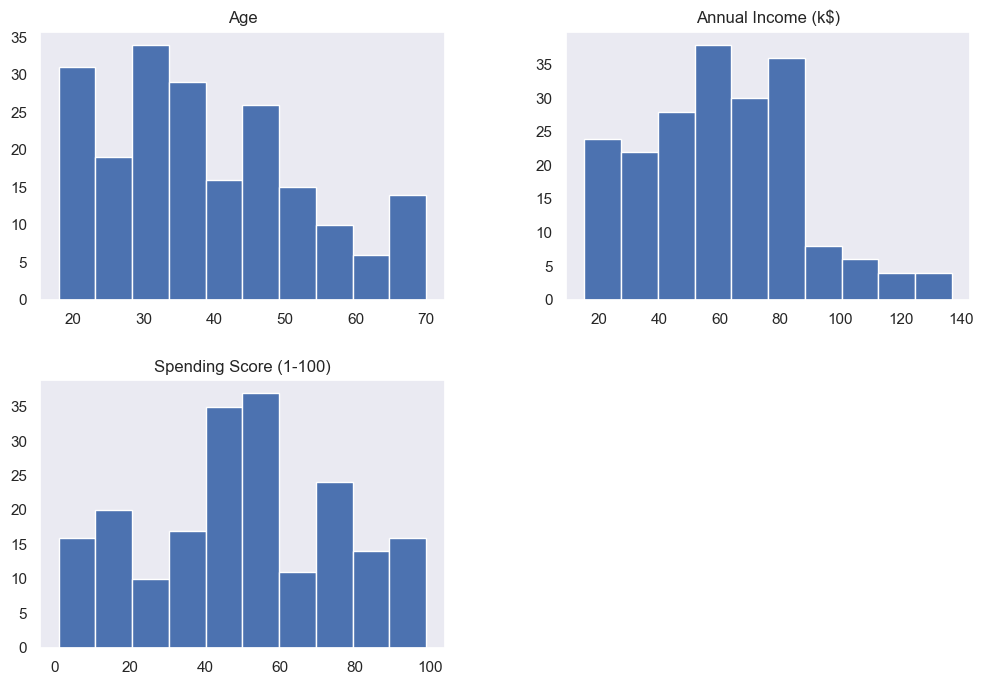

In [110]:
# Visualizing the distribution of Numerical Variables
df_mall_customers.hist(figsize=(12,8), grid= False)
plt.show()

1. Age Distribution:
The histogram shows a higher frequency of individuals in their 20s and 30s.
This suggests that the group is relatively young.
2. Annual Income:
Most people have an annual income ranging between $40,000 to $80,000.
There are peaks in the distribution around this income range, indicating common salary brackets.
3. Spending Score:
The spending score varies among individuals but there is a notable concentration of scores around 40-60.
This could imply a moderate level of spending habit among the group

### Checking for outliers

C:\Users\Sami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sami\AppData\Local\Temp\ipykernel_10980\1420960014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_mall_customers['Age'], orient='v', palette='viridis')


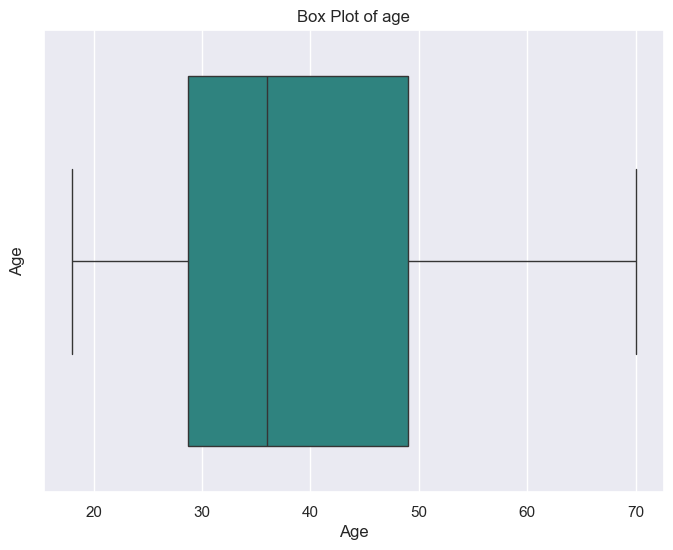

In [111]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'age' column
sns.boxplot(x=df_mall_customers['Age'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of age')
plt.ylabel('Age')

# Show the plot
plt.show()

1. Age Distribution:
The median age is around 40 years.
The interquartile range (IQR) spans from approximately 35 to 45 years, indicating that half of the individuals are within this age bracket.
The data is fairly symmetric around the median, suggesting a normal distribution of ages.
2. Data Spread:
The whiskers extend from approximately 25 to 55 years, which represents the range of the data without considering outliers.
There are no outliers present in this data, which means all age values fall within a reasonable range of the IQR.
3. Overall Interpretation:
The box plot suggests a middle-aged group with a tight age range, primarily concentrated around the median age.
The absence of outliers indicates consistency in the age distribution of the individuals represented in the dataset.

C:\Users\Sami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sami\AppData\Local\Temp\ipykernel_10980\2710051318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_mall_customers['Annual Income (k$)'], orient='v', palette='viridis')


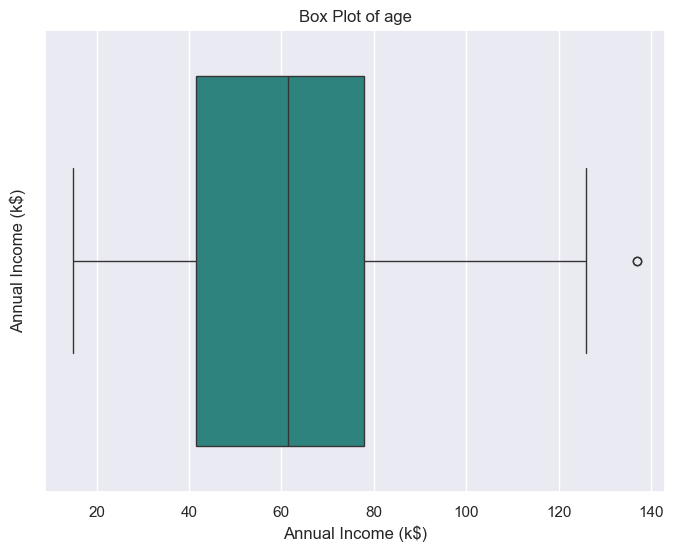

In [112]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'age' column
sns.boxplot(x=df_mall_customers['Annual Income (k$)'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of age')
plt.ylabel('Annual Income (k$)')

# Show the plot
plt.show()

1. Annual Income vs. Age: The box plot is titled “Box Plot of age” against “Annual Income (k$)”, suggesting that it’s showing the distribution of ages across different annual income levels.
2. Median Age: The median age, represented by the line inside the green box, appears to be around an annual income of $80,000.
Interquartile Range (IQR): The green box, which represents the interquartile range, spans from an annual income of approximately $60,000 to $100,000. This indicates that the middle 50% of the data points (ages) fall within this income range.
3. Outliers: There is an outlier marked with a small circle beyond the right whisker at an income above $120,000. This suggests that there is at least one individual whose age is significantly higher than the rest of the group in relation to their income.
4. Spread of Data: The ‘whiskers’ of the box plot extend to show ages associated with incomes less than $60,000 and more than $100,000, indicating a wider spread in the data.
5. Skewness: The presence of an outlier at the higher end of the income scale may indicate a right skew in the data, meaning there are a few individuals with very high incomes compared to the rest.

C:\Users\Sami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sami\AppData\Local\Temp\ipykernel_10980\422073900.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_mall_customers['Spending Score (1-100)'], orient='v', palette='viridis')


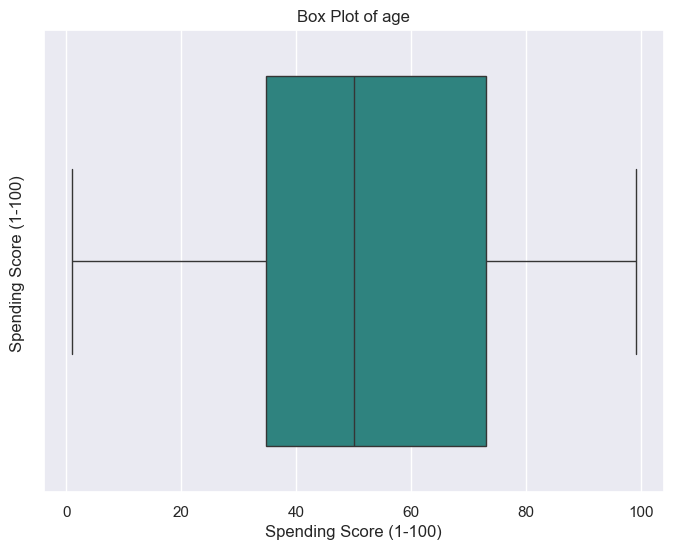

In [113]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'age' column
sns.boxplot(x=df_mall_customers['Spending Score (1-100)'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of age')
plt.ylabel('Spending Score (1-100) ')

# Show the plot
plt.show()

1. Title and Variables: The boxplot is titled “Box Plot of age” and plots age against “Spending Score (1-100)”, indicating that it’s showing the distribution of ages across different spending scores.
2. Interquartile Range (IQR): The green box represents the interquartile range, which is between a spending score of approximately 40 and 60. This suggests that the middle 50% of ages in the dataset have spending scores within this range.
3. Median: The median is indicated by a line within the green box and appears to be centrally located, suggesting a symmetrical distribution of ages around the median spending score.
4. Spread of Data: The horizontal lines extending from either side of the IQR represent the minimum and maximum values within the range that are not considered outliers. The absence of visible outliers and the central placement of the median line suggest that the ages are relatively evenly distributed across the spending scores.
5. Symmetry: The symmetrical distribution implied by the median’s central location within the IQR suggests that the ages are evenly spread around the median spending score, with no significant skewness.

### 2. <b> Bivariate Data analysis

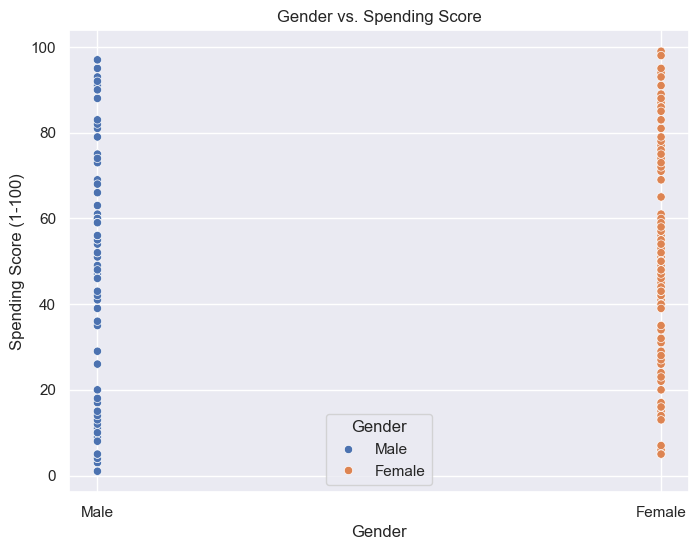

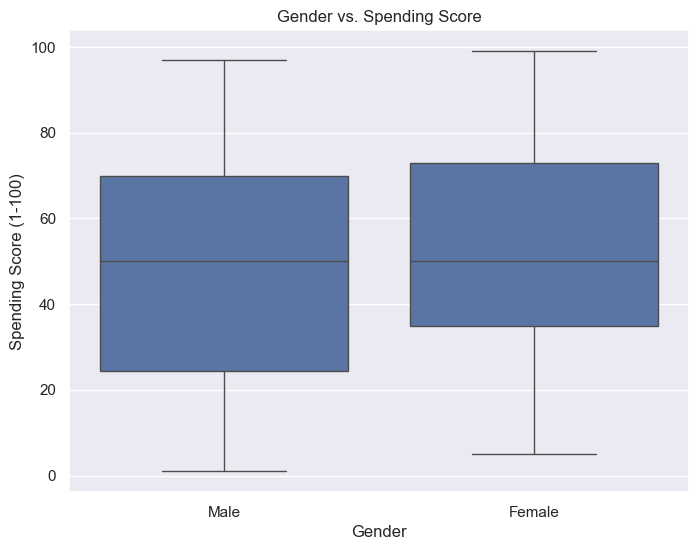

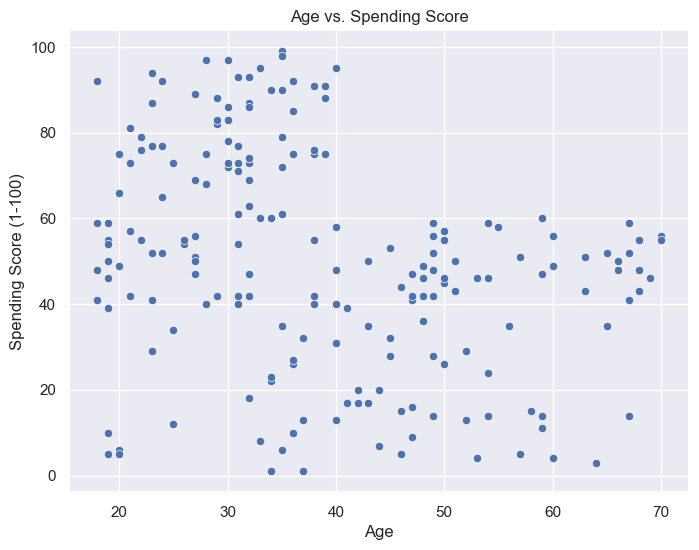

Correlation between Age and Spending Score: -0.32722684603909


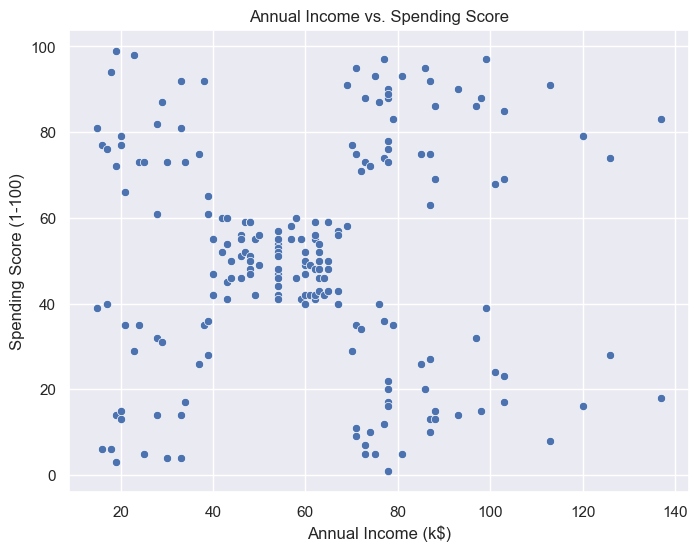

Correlation between Annual Income and Spending Score: 0.009902848094037606


In [114]:
# Scatter plot: Gender vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mall_customers, x='Gender', y='Spending Score (1-100)', hue='Gender')
plt.title('Gender vs. Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Box plot: Gender vs. Spending Score
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_mall_customers, x='Gender', y='Spending Score (1-100)')
plt.title('Gender vs. Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Scatter plot: Age vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mall_customers, x='Age', y='Spending Score (1-100)')
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Correlation analysis: Age vs. Spending Score
correlation_age_spending = df_mall_customers['Age'].corr(df_mall_customers['Spending Score (1-100)'])
print("Correlation between Age and Spending Score:", correlation_age_spending)

# Scatter plot: Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mall_customers, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Correlation analysis: Annual Income vs. Spending Score
correlation_income_spending = df_mall_customers['Annual Income (k$)'].corr(df_mall_customers['Spending Score (1-100)'])
print("Correlation between Annual Income and Spending Score:", correlation_income_spending)



### <b> Multivariate Analysis

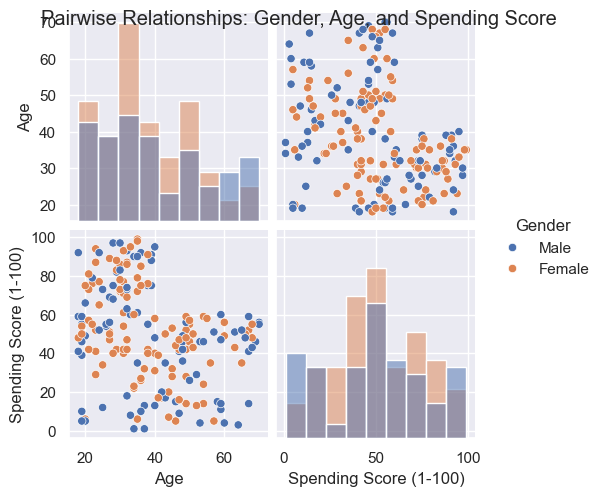

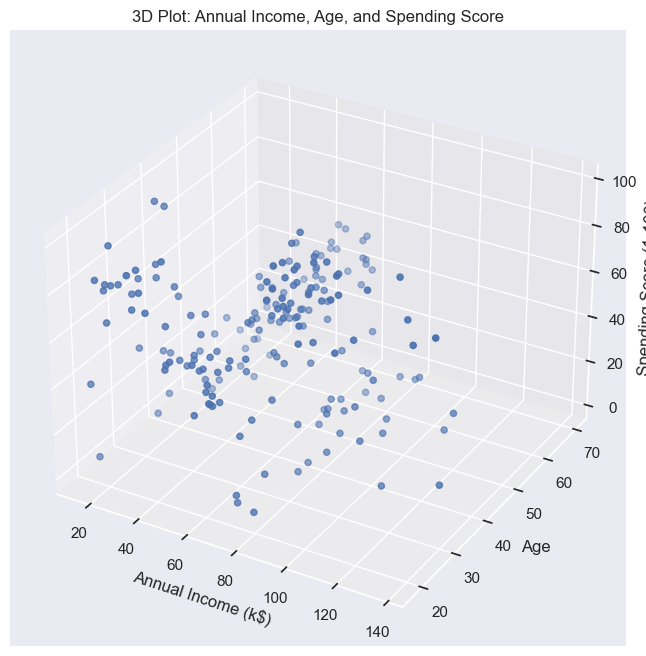

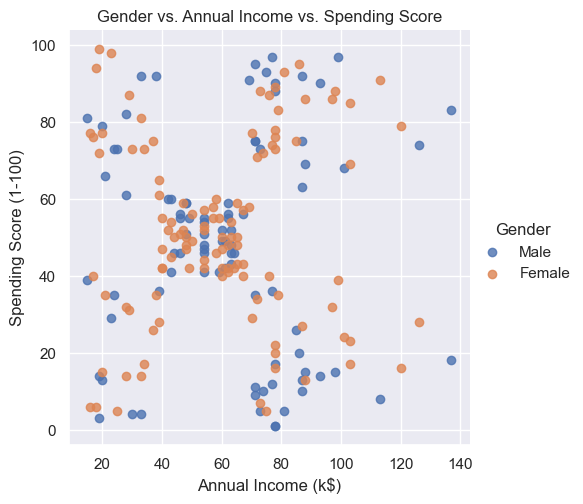

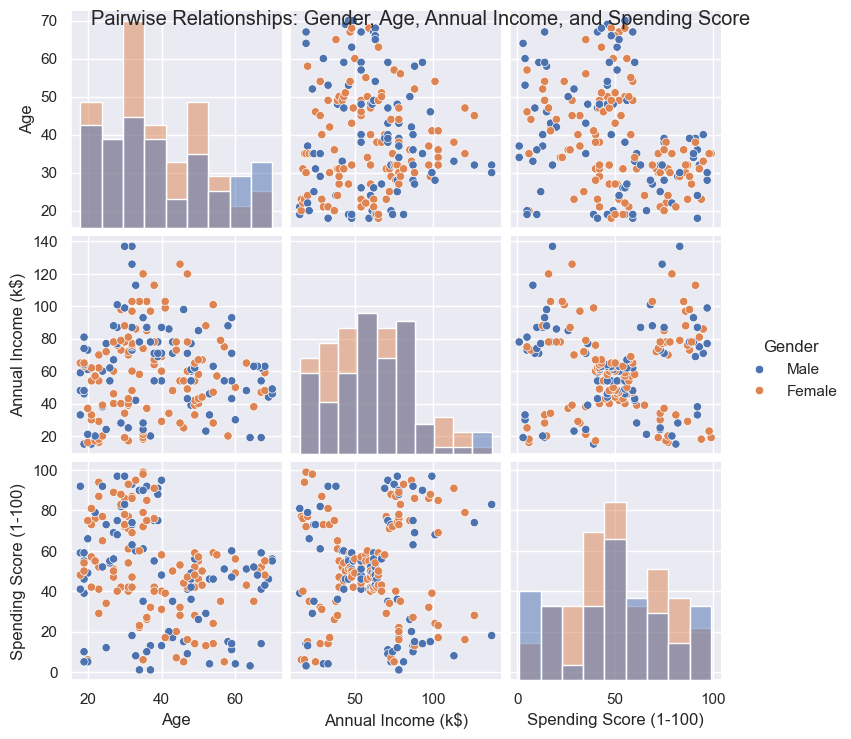

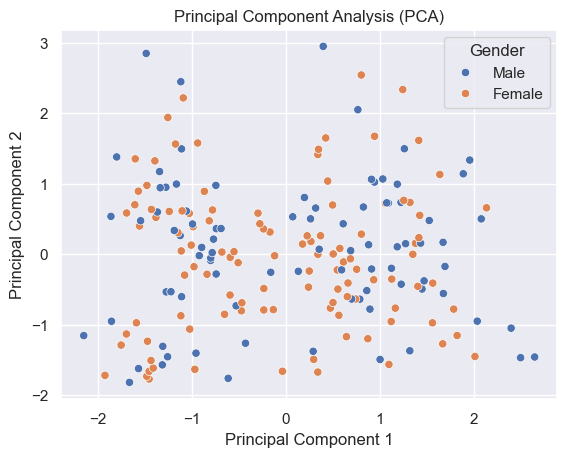

In [115]:
# Multivariate Analysis: Gender, Age, and Spending Score
sns.pairplot(df_mall_customers, vars=['Age', 'Spending Score (1-100)'], hue='Gender', diag_kind='hist')
plt.suptitle('Pairwise Relationships: Gender, Age, and Spending Score')
plt.show()

# Multivariate Analysis: Annual Income, Age, and Spending Score
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_mall_customers['Annual Income (k$)'], df_mall_customers['Age'], df_mall_customers['Spending Score (1-100)'])
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Plot: Annual Income, Age, and Spending Score')
plt.show()

# Multivariate Analysis: Gender, Annual Income, and Spending Score
sns.lmplot(data=df_mall_customers, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', fit_reg=False)
plt.title('Gender vs. Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Multivariate Analysis: Gender, Age, Annual Income, and Spending Score
sns.pairplot(df_mall_customers, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='hist')
plt.suptitle('Pairwise Relationships: Gender, Age, Annual Income, and Spending Score')
plt.show()

# Multivariate Analysis: Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
x = df_mall_customers.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate with gender for visualization
final_df = pd.concat([principal_df, df_mall_customers['Gender']], axis=1)

# Visualize PCA
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='Gender')
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**The Hypothesis**

  **Null Hypothesis:** Annual income has no significant correlation with spending score..
  
  **Alternative Hypothesis:** There is a significant correlation between annual income and spending score.

In [116]:
# Extracting annual income and spending score from the DataFrame
annual_income = df_mall_customers['Annual Income (k$)']
spending_score = df_mall_customers['Spending Score (1-100)']

# Calculating Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(annual_income, spending_score)

# Define significance level
alpha = 0.05

# Print results
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Null Hypothesis: Annual income has no significant correlation with spending score
# Alternative Hypothesis: There is a significant correlation between annual income and spending score

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between annual income and spending score.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between annual income and spending score.")

Pearson correlation coefficient: 0.009902848094037624
p-value: 0.8893134370273991
Fail to reject the null hypothesis. There is no significant correlation between annual income and spending score.


Pearson Correlation Coefficient: The coefficient value of 0.009902848094037624
 indicates a very weak positive relationship between annual income and spending score. This suggests that there is almost no linear correlation between the two variables.
P-value: With a p-value of 0.8893134370273991
, which is much higher than the common alpha level of 0.05, there is not enough evidence to reject the null hypothesis.
Conclusion: The null hypothesis, which states that annual income has no significant correlation with spending score, cannot be rejected. This implies that any correlation observed is likely due to chance rather than any meaningful financial behavior patterns.

In summary, the data does not provide sufficient evidence to suggest that there is a significant correlation between annual income and spending score. For businesses or financial analysts, this could mean that spending score might not be effectively predicted by annual income alone and other factors should be considered.

**The Analytical Questions**
1. What is the average spending score for male and female customers?
2. What is the distribution of spending scores across different age groups?
3. How does annual income correlate with spending score?

1. What is the average spending score for male and female customers?

In [117]:
# Grouping the data by 'Gender' and calculating the mean of 'Spending Score (1-100)'
average_spending_score = df_mall_customers.groupby('Gender')['Spending Score (1-100)'].mean()

# Displaying the average spending score for male and female customers
print("Average Spending Score for Male and Female Customers:")
print(average_spending_score)


Average Spending Score for Male and Female Customers:
Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


This indicates that female customers, on average, have a slightly higher spending score compared to male customers.

2. What is the distribution of spending scores across different age groups?

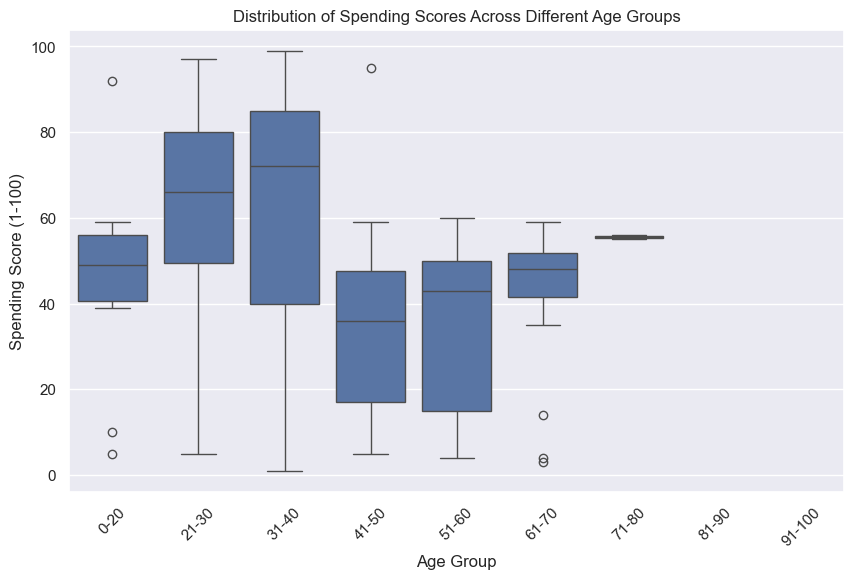

In [118]:
# Define the age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Add a new column to the DataFrame with age groups
df_mall_customers['Age Group'] = pd.cut(df_mall_customers['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot the distribution of spending scores across different age groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mall_customers, x='Age Group', y='Spending Score (1-100)')
plt.title('Distribution of Spending Scores Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


1. Younger Age Groups (<20 and 21-30): These groups have similar median spending scores, which are around 60. This suggests that younger individuals tend to have a moderate level of spending.
2. Peak Spending (31-40): The 31-40 age group shows a significantly higher median spending score, close to 80. This indicates that individuals in this age bracket may have more disposable income or a higher propensity to spend.
3. Declining Spending with Age: From the 41-50 age group onwards, there is a noticeable decline in median spending scores. This trend continues as age increases, with the 91-100 age group having the lowest median spending score.
4. Presence of Outliers: Most age groups display outliers, which are individual cases where the spending score is significantly different from the rest of the group. This could be due to a variety of factors, such as income disparities or different personal spending habits.


3. How does annual income correlate with spending score?

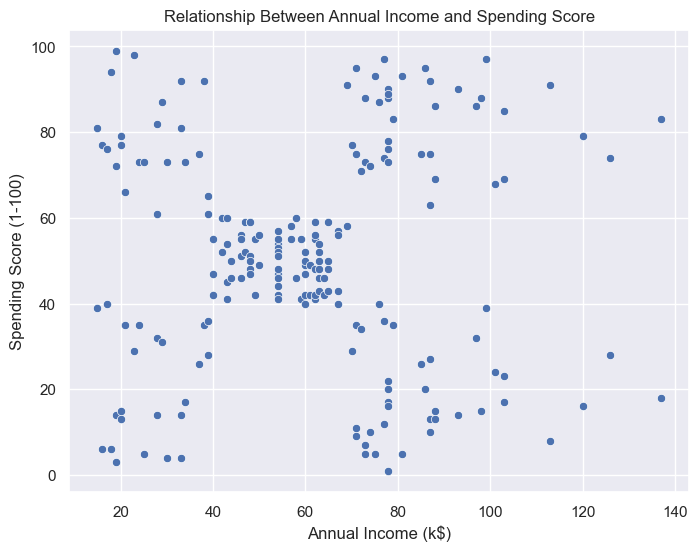

Pearson correlation coefficient between Annual Income and Spending Score: 0.009902848094037606


In [119]:
# Plotting the relationship between annual income and spending score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mall_customers, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Relationship Between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Calculating the Pearson correlation coefficient
correlation_coefficient = df_mall_customers['Annual Income (k$)'].corr(df_mall_customers['Spending Score (1-100)'])

# Printing the correlation coefficient
print("Pearson correlation coefficient between Annual Income and Spending Score:", correlation_coefficient)


very weak positive linear relationship
between Annual Income and Spending Score. This implies that an increase in annual income does not necessarily lead to a significant increase in spending score, and vice versa.

Here are some key points based on this observation:

1. Minimal Impact: The correlation coefficient suggests that other factors, aside from annual income, may have a more substantial impact on how much individuals spend.
2. Diverse Spending Habits: Given the weak correlation, it’s likely that people with similar incomes have varied spending habits, possibly influenced by personal preferences, financial obligations, or savings goals.
3. Targeted Marketing: For businesses, this could mean that income alone may not be a reliable indicator for predicting customer spending behavior. A more nuanced approach, considering a variety of demographic and psychographic factors, might be necessary for effective marketing strategies.

Choosing the Annual Income Column & Spending Score column

In [120]:
# Extract columns 3 and 4
x = df_mall_customers.iloc[:, [2, 3]].values

In [121]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [122]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

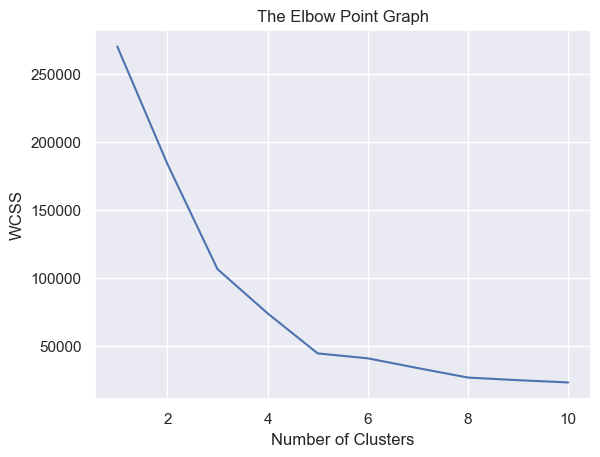

In [123]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

 observations:

1. Elbow Method Application: The graph is a classic example of the elbow method used in determining the optimal number of clusters for K-means clustering. The method involves plotting the Within-Cluster-Sum-of-Squares (WCSS) against the number of clusters and looking for the ‘elbow point’ where the rate of decrease sharply changes.
2. Optimal Clusters: The elbow point on the graph is around the number 4, indicating that four clusters might be the optimal number for this particular dataset. This is where the WCSS value starts to decrease at a slower rate, suggesting that adding more clusters beyond this point does not significantly improve the variance explained by the clustering.
3. WCSS Trend: Initially, the WCSS values decrease rapidly as the number of clusters increases from 2 to 4, which implies that each additional cluster is capturing a significant amount of variance within the data. After the number of clusters reaches 4, the reduction in WCSS becomes more gradual, indicating diminishing returns on the explained variance.
4. Cluster Analysis: The analysis suggests that the data can be reasonably grouped into four distinct categories, which could represent different segments or types of data points within the overall dataset.
5. Implications for Data Analysis: The elbow graph is a crucial step in cluster analysis as it helps in deciding how many clusters to use, which can significantly impact the results of the analysis and the insights that can be drawn from it.

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [124]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(x)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


this are the cluster they are belong to

5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

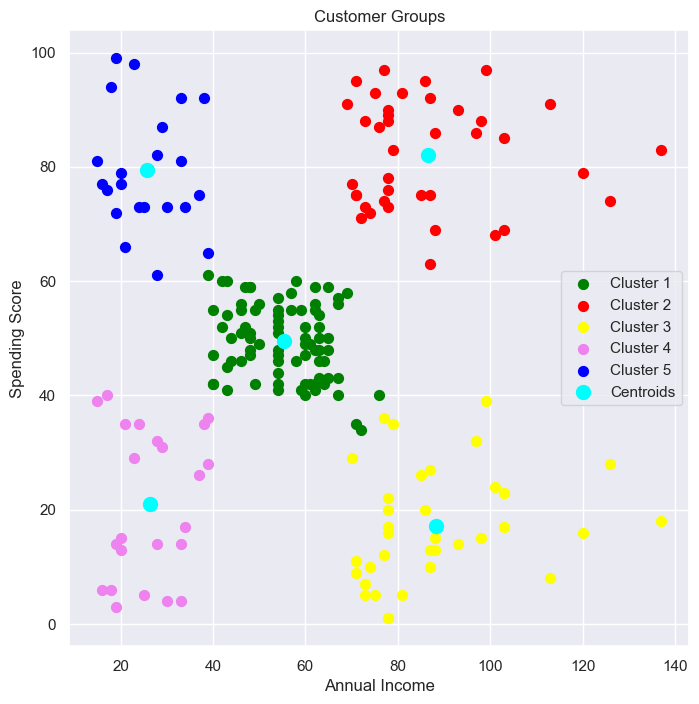

In [125]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Clusters Identification: There are five distinct clusters, each likely representing a different type of customer group:
1. Blue Cluster: Customers with low annual income (20-40) but high spending scores (60-100).
2. Red Cluster: Customers with high annual income (70-140) and high spending scores (60-100).
3. Green Cluster: Customers with moderate annual income (40–70) and moderate spending scores (40–60).
4. Purple Cluster: Customers with low annual income (20–40) and low spending scores (0–40).
5. Yellow Cluster: Customers with high annual income (70–140) but low spending scores (0–40).

Marketing Insights: This kind of analysis can provide valuable insights for targeted marketing strategies. For example, customers in the red cluster might be targeted for luxury goods, while those in the purple cluster might be more responsive to cost-saving offers.
Data Distribution: The distribution of data points within each cluster can give an idea about the variance in the spending behavior of customers within the same income range.
Potential Strategies: Based on the clusters, businesses can tailor their marketing strategies to better meet the needs of each customer group, potentially increasing sales and customer satisfaction.

In conclusion, the scatter plot analysis reveals distinct customer groups based on their annual income and spending score, which can be leveraged to create targeted marketing strategies. The blue and red clusters represent customers with high spending scores but at opposite ends of the income spectrum, suggesting different approaches for engagement. The green cluster represents a stable market segment with moderate income and spending, which could be the target for consistent, long-term marketing efforts. The purple and yellow clusters indicate groups with low spending scores, but differing incomes, highlighting potential for upselling or value-based marketing. Overall, this data-driven approach can guide businesses in customizing their offerings and promotions to meet the unique needs and preferences of each customer segment, ultimately aiming to enhance customer satisfaction and drive sales growth.